In [3]:
batches = {'BCP_65C': 'BCP_65C/Grayavelabs_Jan_65C_BCP',
           'BCP_85C': 'BCP_85C/Jan09',
           'FACs_75C': 'FACs_75C/Dec9th',
           'SnO2_65C': 'SnO2_65C/Grayavelabs_Jan_65C_SnO2',
           'SnO2_85C': 'SnO2_85C/Jan8th'}

data_folder = 'data_raw' # path to raw data
save_folder = 'data_formatted' # path to save formatted data
config_file = 'config.xlsx' # path to config file

thresholds0 = {'Jsc (mA cm-2)': [15, 20], # starting thresholds
            'Voc (V)' : [0.8,2], 
            'PCE (%)': [10,100], 
            'FF (%)': [50,100]}

thresholds_all = {'Jsc (mA cm-2)': [0, 30], # starting thresholds
                 'Voc (V)' : [0,3], 
                'PCE (%)': [0,100], 
                'FF (%)': [0,100]}

config_dict = {'SC': 'blue', 'OC': 'red', 'MPP': 'green'}

In [4]:
# imports
%pip install -r requirements.txt
from logger_setup import logger # logger
from batch import Batch         # batch class
import matplotlib.pyplot as plt # plotting
import pandas as pd             # data manipulation

Note: you may need to restart the kernel to use updated packages.


2025-02-20 02:11:36,973 - MyLogger - INFO - Initialising batch from data_raw/BCP_65C/Grayavelabs_Jan_65C_BCP
2025-02-20 02:11:36,975 - MyLogger - INFO - Measurement hours: [0, 43, 72, 192, 230, 310, 370, 400, 423]
2025-02-20 02:11:37,040 - MyLogger - INFO - Calculating Jsc, Voc, PCE...
2025-02-20 02:11:39,023 - MyLogger - INFO - Saved data to data_formatted/BCP_65C
2025-02-20 02:11:39,024 - MyLogger - INFO - Plotting overview...
2025-02-20 02:11:39,544 - MyLogger - INFO - Saved plot to data_formatted/BCP_65C_overview.png
2025-02-20 02:11:39,544 - MyLogger - INFO - Plotting IV curves...


FileNotFoundError: [Errno 2] No such file or directory: 'data_formatted/BCP_65C_IV/SC_00F743_1.png'

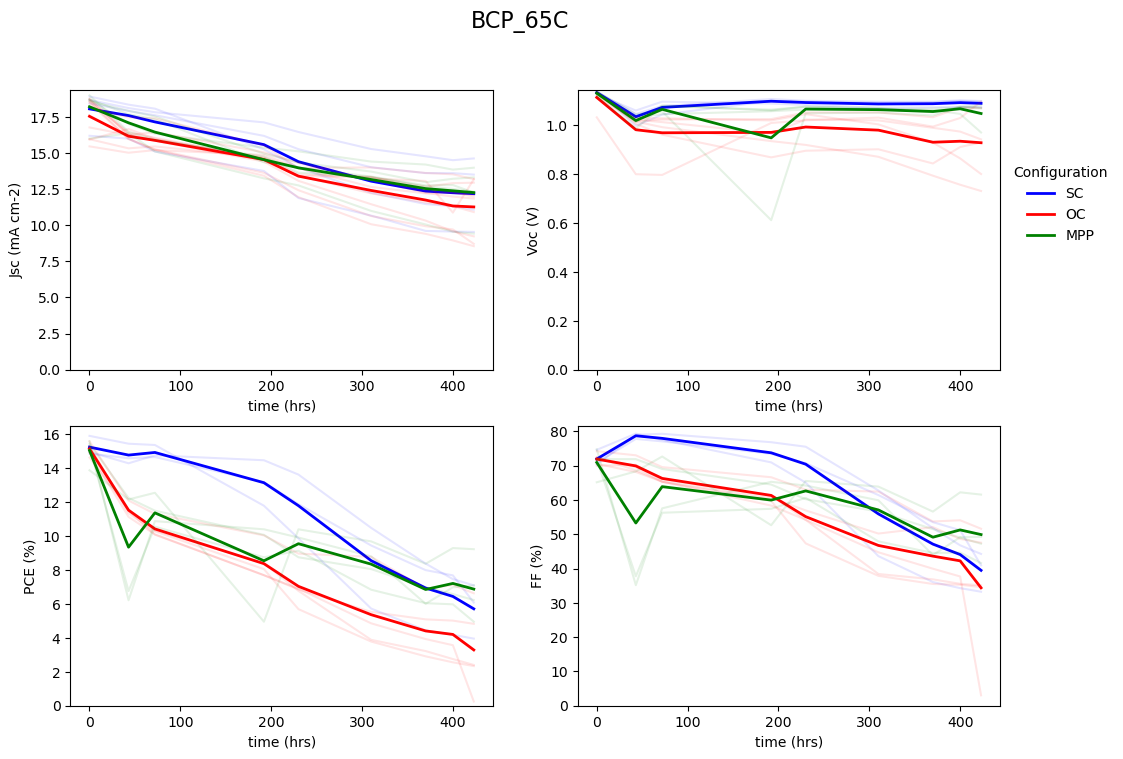

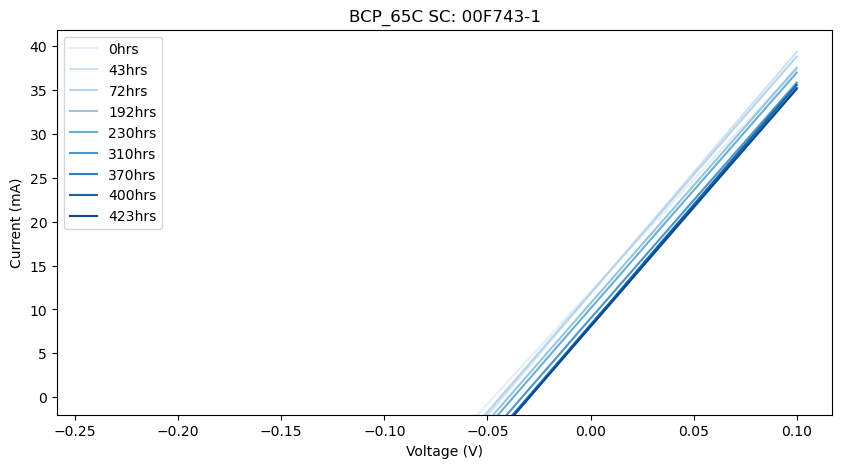

In [ ]:
for name, dir in batches.items():
    batch = Batch(batch_name=name, batch_dir=f'{data_folder}/{dir}', config_file=config_file, substrates_file=f'{data_folder}/{name}/Specific.csv')
    batch.pop_df(save=True, save_path=f'{save_folder}/{name}/{name}.csv') # populate df done separately for saving configurations and so that Voc, Jsc, FF, and PCE factors can be changed manually
    batch.plot_overview(thresholds0, thresholds_all, config_dict, save=True, save_path=f'{save_folder}/{name}_overview.png', title=name) # plot overview
    batch.plot_IV(save=True, save_path=f'{save_folder}/{name}_IV/{name}') # plot IV